## Solutions (DAY 3)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('crime_population_netherlands.csv')

In [3]:
dataset.head()

CBScode   Municipality       Province  Population  Population_density(p/km)  \
0  GM1680    Aa en Hunze        Drenthe       25243                        93   
1  GM0738        Aalburg  North Brabant       12859                       253   
2  GM0358       Aalsmeer  North Holland       30792                      1486   
3  GM0197         Aalten     Gelderland       27030                       283   
4  GM0059  Achtkarspelen      Friesland       28002                       274   

   HIC: Theft / burglary dwelling, complete  \
0                                        39   
1                                         7   
2                                        60   
3                                        25   
4                                        27   

   HIC: Theft / burglary dwelling, attempts  HIC: Violent Crime  \
0                                        17                  51   
1                                         6                  29   
2                                        20                 112   
3                                        11                  68   
4                                         2                  99   

   HIC: Street Roof  HIC: Robberies      ...        \
0                 0               0      ...         
1                 0               2      ...         
2                 2               0      ...         
3                 0               0      ...         
4                 0               0      ...         

   Theft / burglary companies / institutions  \
0                                         16   
1                                         10   
2                                         47   
3                                         21   
4                                         48   

   Theft / burglary garage / barn / shed  Drug trafficking  Trespassing  \
0                                     12                 2            2   
1                                      4                 4            1   
2                                     17                11            7   
3                                     15                 9            5   
4                                      5                21            0   

   mistreatment  Overt violence (person)  Or destruction. cause damage  \
0            30                        0                           107   
1            15                        0                            35   
2            64                        1                           115   
3            28                        3                            59   
4            66                        2                           114   

   Arms Trade  pickpocketing  morals Felony  
0           1              2             15  
1           1              2              6  
2           3              7             12  
3           4              4              6  
4           3              3              8  

[5 rows x 26 columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 26 columns):
CBScode                                      390 non-null object
Municipality                                 390 non-null object
Province                                     390 non-null object
Population                                   390 non-null int64
Population_density(p/km)                     390 non-null int64
HIC: Theft / burglary dwelling, complete     390 non-null int64
HIC: Theft / burglary dwelling, attempts     390 non-null int64
HIC: Violent Crime                           390 non-null int64
HIC: Street Roof                             390 non-null int64
HIC: Robberies                               390 non-null int64
Undermining public order                     390 non-null int64
Threat                                       390 non-null int64
Fire / Explosion                             390 non-null int64
Theft of moped, moped, bike                  390 non-null in

In [5]:
dataset['Province'].unique()

array(['Drenthe', 'North Brabant', 'North Holland', 'Gelderland',
       'Friesland', 'South Holland', 'Overijssel', 'Flevoland', 'Utrecht',
       'Groningen', 'Limburg', 'Zeeland'], dtype=object)

In [6]:
X = dataset.iloc[:, 3:]

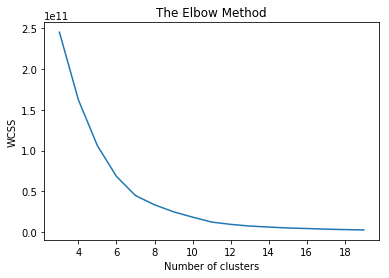

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(3, 20):
    kmeans = KMeans(n_clusters = i, random_state = 32)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(3, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters = 12, random_state = 32)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)


In [9]:
# Fit the pipeline to samples
pipeline.fit(X)

# Calculate the cluster labels: labels
labels = pipeline.predict(X)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels' : labels, 'crime' : dataset['Province']})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['crime'])

In [10]:
ct

crime   Drenthe  Flevoland  Friesland  Gelderland  Groningen  Limburg  \
labels                                                                  
0             8          1         19          32         20       19   
1             0          0          0           0          0        0   
2             0          0          0           1          1        0   
3             0          0          0           0          0        0   
4             0          0          0           1          0        2   
5             0          0          0           0          0        0   
6             2          1          0           2          0        1   
7             0          0          0           0          0        0   
8             2          3          4          16          2        7   
9             0          0          1           1          0        4   
10            0          0          0           0          0        0   
11            0          1          0           1          0        0   

crime   North Brabant  North Holland  Overijssel  South Holland  Utrecht  \
labels                                                                     
0                  43             21          16             17       12   
1                   0              0           0              1        0   
2                   2              0           0              0        0   
3                   0              1           0              0        0   
4                   0              7           0             16        2   
5                   0              0           0              1        0   
6                   4              4           4              3        1   
7                   0              0           0              0        1   
8                  15             11           4             14        9   
9                   0              1           1              1        1   
10                  0              3           0              7        0   
11                  2              0           0              0        0   

crime   Zeeland  
labels           
0             9  
1             0  
2             0  
3             0  
4             0  
5             0  
6             0  
7             0  
8             4  
9             0  
10            0  
11            0

In [11]:
col_list= list(dataset)
for x in ['CBScode', 'Municipality', 'Province', 'Population', 'Population_density(p/km)']:
    col_list.remove(x)

In [12]:
dataset['all_crime'] = dataset[col_list].sum(axis=1)

In [13]:
X = dataset[['Population_density(p/km)', 'all_crime']].values

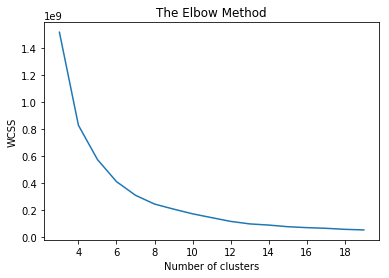

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(3, 20):
    kmeans = KMeans(n_clusters = i, random_state = 32)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(3, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters = 3, random_state = 32)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)


In [16]:
# Fit the pipeline to samples
pipeline.fit(X)

# Calculate the cluster labels: labels
labels = pipeline.predict(X)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels' : labels, 'crime' : dataset['Province']})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['crime'])

c:\users\seun.adekunle\appdata\local\continuum\anaconda3\envs\myml\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [17]:
ct

crime   Drenthe  Flevoland  Friesland  Gelderland  Groningen  Limburg  \
labels                                                                  
0            12          5         24          51         22       29   
1             0          1          0           3          1        4   
2             0          0          0           0          0        0   

crime   North Brabant  North Holland  Overijssel  South Holland  Utrecht  \
labels                                                                     
0                  61             35          25             34       22   
1                   5             12           0             24        4   
2                   0              1           0              2        0   

crime   Zeeland  
labels           
0            13  
1             0  
2             0

In [20]:
dataset['cluster'] = labels

In [25]:
high = dataset[dataset['cluster']==2]

In [26]:
high[['Municipality', 'cluster']]

Municipality  cluster
15             Amsterdam        2
127  Hague, TheThe Hague        2
279            Rotterdam        2

## K-Means Clustering

In [27]:
# Location of dataset
url = 'pggm_dataset.csv'

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url)

In [28]:
irisdata['GICS_Sector'].unique()

array(['Industrials', 'Utilities', 'Information Technology',
       'Health Care', 'Financials', 'Consumer Staples',
       'Consumer Discretionary', 'Materials', 'Energy',
       'Communication Services', 'Real Estate'], dtype=object)

In [29]:
from sklearn import preprocessing 

print("Samples: {}, Features: {}".format(*irisdata.shape))
 
le = preprocessing.LabelEncoder()
temp = irisdata['GICS_Sector']

le.fit(temp)
irisdata['Sector'] = le.transform(temp)#temp.apply(le.fit_transform)
irisdata.head()

Samples: 38304, Features: 18


Identifier                              Name      Period  Period_YYYYMMDD  \
0   17290810                Cintas Corporation  12/31/2014         20141231   
1   80589M10                 SCANA Corporation  12/31/2014         20141231   
2   50241310  L-3 Communications Holdings Inc.  12/31/2014         20141231   
3   91301710   United Technologies Corporation  12/31/2014         20141231   
4   92939U10      Wisconsin Energy Corporation  12/31/2014         20141231   

    Ticker  Universe_Returns_F1W  Universe_Returns_F4W  Universe_Returns_F12W  \
0  CTAS-US             -2.517855             -0.121111               4.156041   
1   SCG-US              2.036428              6.307948              -8.426744   
2   LLL-US             -0.396162             -1.283580              -0.753021   
3   UTX-US             -1.973909              1.669562               1.815629   
4   WEC-US              1.118696              7.679176              -6.160975   

     Weight  GICS_Sector                        GICS_Ind_Grp  Market_Cap_USD  \
0  0.000402  Industrials  Commercial & Professional Services        7761.120   
1  0.000422    Utilities                           Utilities        8151.001   
2  0.000563  Industrials                       Capital Goods       10883.341   
3  0.005174  Industrials                       Capital Goods       99942.990   
4  0.000616    Utilities                           Utilities       11893.872   

   Price_USD    NTM_EP   LTM_ROA        BP    LTM_EP  5Y_Sales_Growth  Sector  
0      78.44  0.044387  9.089989  0.246962  0.042708         4.718765       6  
1      60.40  0.061397  3.472852  0.572871  0.062748        -0.949881      10  
2     126.21  0.060554  4.744629  0.570099  0.059821        -4.316938       6  
3     115.00  0.062889  6.805052  0.325584  0.059088         3.083364       6  
4      52.74  0.051359  4.201019  0.369798  0.050815         1.421392      10

In [30]:
from sklearn.preprocessing import StandardScaler


# Create scaler: scaler
scaler = StandardScaler()
X = irisdata.iloc[:, [12, 8]].values
X = scaler.fit_transform(X)

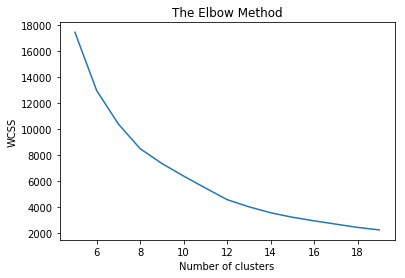

In [31]:
from sklearn.cluster import KMeans
wcss = []
for i in range(5, 20):
    kmeans = KMeans(n_clusters = i, random_state = 32)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(5, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
kmeans = KMeans(n_clusters = 11, random_state = 32)
y_kmeans = kmeans.fit_predict(X)

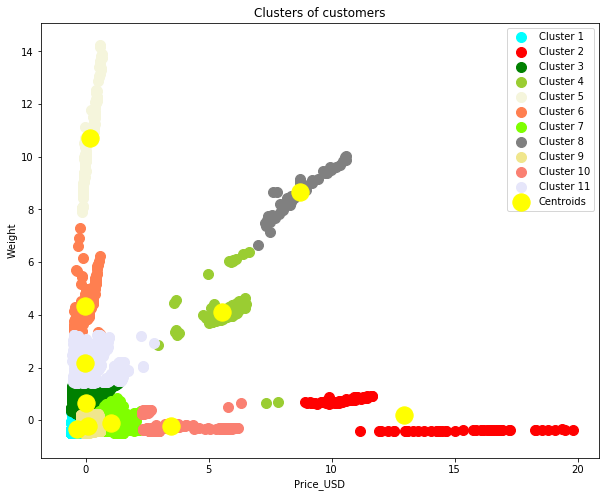

In [33]:
Colormap = ['aqua', 'red', 'green', 'yellowgreen', 'beige', 'coral',
            'chartreuse', 'grey', 'khaki', 'salmon', 'lavender', 'lime']
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = Colormap[0], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = Colormap[1], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = Colormap[2], label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = Colormap[3], label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = Colormap[4], label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = Colormap[5], label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = Colormap[6], label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = Colormap[7], label = 'Cluster 8')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 100, c = Colormap[8], label = 'Cluster 9')
plt.scatter(X[y_kmeans == 9, 0], X[y_kmeans == 9, 1], s = 100, c = Colormap[9], label = 'Cluster 10')
plt.scatter(X[y_kmeans == 10, 0], X[y_kmeans == 10, 1], s = 100, c = Colormap[10], label = 'Cluster 11')#
#plt.scatter(X[y_kmeans == 11, 0], X[y_kmeans == 11, 1], s = 100, c = Colormap[11], label = 'Cluster 12')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Price_USD')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [43]:
import math
def euclidean(x1, x2):
    assert(len(x1) == len(x2))
    distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x1, x2)]))
    return distance

In [44]:
b = range(10)
for i,elem in enumerate(b):
    print(i,elem)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [45]:
all_distances = []
for i, center_cordinates in enumerate(kmeans.cluster_centers_):
    distances = []
    for x_coord, y_coord in zip(X[y_kmeans == i, 0], X[y_kmeans == i, 1]):
        distances.append(euclidean([x_coord, y_coord], center_cordinates))
    all_distances.append(distances)

In [46]:
# this are the indices of the largest distance in for cluster 0
np.argsort(all_distances[0])[-5:][::-1]

array([19614,  1034,   684,  1471,  9225], dtype=int64)

In [47]:
irisdata.loc[19614,:]

Identifier                          40621610
Name                     Halliburton Company
Period                              6-6-2018
Period_YYYYMMDD                     20180606
Ticker                                HAL-US
Universe_Returns_F1W                -1.30435
Universe_Returns_F4W                -7.80538
Universe_Returns_F12W               -15.6936
Weight                              0.001702
GICS_Sector                           Energy
GICS_Ind_Grp                          Energy
Market_Cap_USD                       42258.1
Price_USD                               48.3
NTM_EP                              0.059276
LTM_ROA                             -1.46178
BP                                  0.192199
LTM_EP                             -0.008846
5Y_Sales_Growth                     -2.10713
Sector                                     3
Name: 19614, dtype: object

In [54]:
# this are the values of the largest distance in for cluster 0
np.sort(all_distances[0])[-100:][::-1]

array([0.65675422, 0.60295907, 0.59865025, 0.58894807, 0.58453634,
       0.58333726, 0.58110801, 0.574831  , 0.57254482, 0.57193106,
       0.57182161, 0.570764  , 0.56600712, 0.56460758, 0.5623833 ,
       0.56230611, 0.5600775 , 0.55905106, 0.55855309, 0.55773931,
       0.55659917, 0.55554534, 0.5553593 , 0.55479578, 0.55387371,
       0.55305484, 0.55256829, 0.55254993, 0.55118628, 0.55114284,
       0.5508437 , 0.54993232, 0.54980983, 0.54903546, 0.54883078,
       0.54610227, 0.54593277, 0.54585619, 0.5453235 , 0.54404294,
       0.54399651, 0.54332895, 0.54327606, 0.54306448, 0.54261662,
       0.54173644, 0.54161331, 0.54147773, 0.54125448, 0.53968973,
       0.53966767, 0.53965502, 0.53955719, 0.53888683, 0.53848314,
       0.53794326, 0.5373776 , 0.53715229, 0.53702925, 0.5370291 ,
       0.5367624 , 0.53591947, 0.53481796, 0.53459146, 0.5341313 ,
       0.53350458, 0.53337656, 0.53232007, 0.53209548, 0.53197763,
       0.53164912, 0.53119399, 0.53078904, 0.53065529, 0.53000

In [33]:
# Try the same procedure using a variable called Sector from re-encoding/transforming GISC_Sector into numerical values from 0 to its total number of unique values and NTM_EP

In [34]:
# Remove missing data
irisdata = irisdata.dropna()

X = irisdata.iloc[:, [18, 13]].values

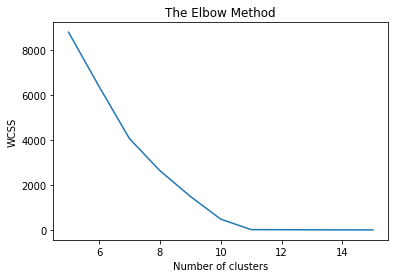

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(5, 16):
    kmeans = KMeans(n_clusters = i, random_state = 32)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(5, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 12, random_state = 32)
y_kmeans = kmeans.fit_predict(X)

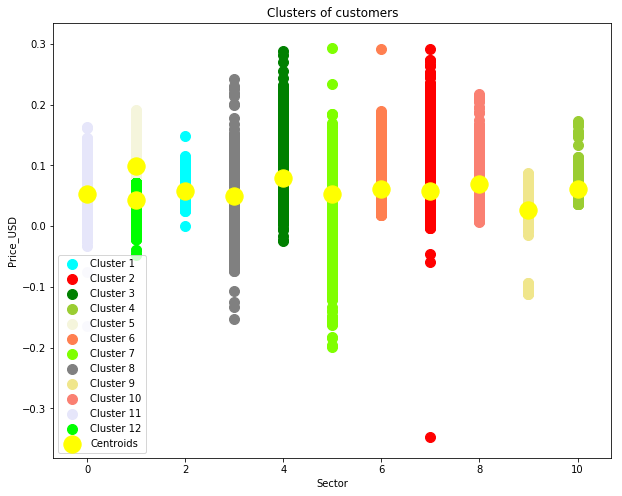

In [37]:
Colormap = ['aqua', 'red', 'green', 'yellowgreen', 'beige', 'coral',
            'chartreuse', 'grey', 'khaki', 'salmon', 'lavender', 'lime']
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = Colormap[0], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = Colormap[1], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = Colormap[2], label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = Colormap[3], label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = Colormap[4], label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = Colormap[5], label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = Colormap[6], label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = Colormap[7], label = 'Cluster 8')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 100, c = Colormap[8], label = 'Cluster 9')
plt.scatter(X[y_kmeans == 9, 0], X[y_kmeans == 9, 1], s = 100, c = Colormap[9], label = 'Cluster 10')
plt.scatter(X[y_kmeans == 10, 0], X[y_kmeans == 10, 1], s = 100, c = Colormap[10], label = 'Cluster 11')
plt.scatter(X[y_kmeans == 11, 0], X[y_kmeans == 11, 1], s = 100, c = Colormap[11], label = 'Cluster 12')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Sector')
plt.ylabel('Price_USD')
plt.legend()
plt.show()

## Clustering Metric

In [38]:
# From the first exercise, provide a silouhette sample plot and comment about it.

In [39]:
irisdata = irisdata.dropna()
X = irisdata.iloc[:, [11 ,12,13,14,15,16]].values

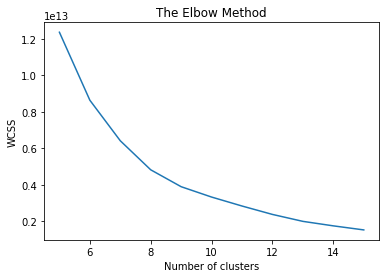

In [40]:
from sklearn.cluster import KMeans
wcss = []
for i in range(5, 16):
    kmeans = KMeans(n_clusters = i, random_state = 32)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(5, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
kmeans = KMeans(n_clusters = 12, random_state = 32)
y_kmeans = kmeans.fit_predict(X)

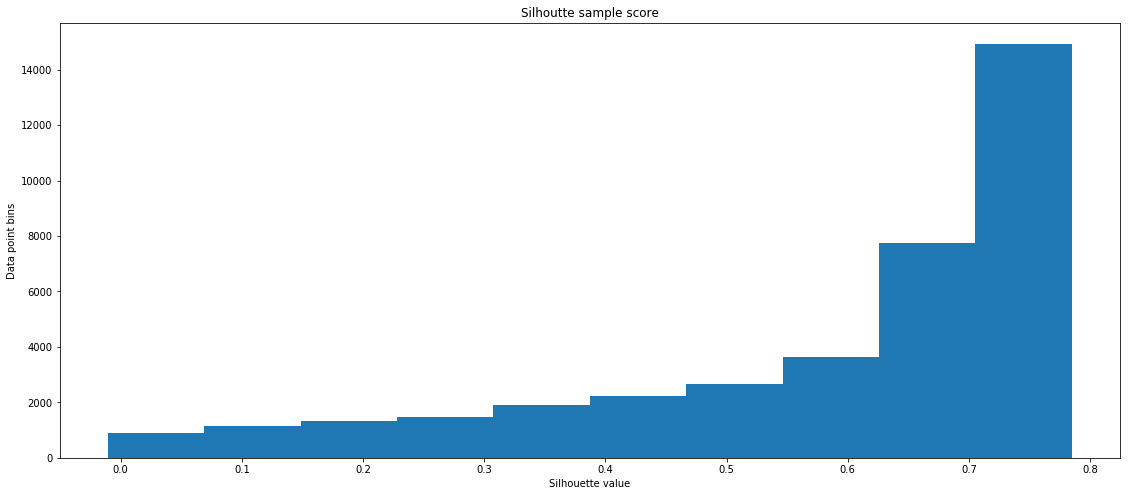

In [42]:
# visualize silhoutte sample scores
from sklearn.metrics import silhouette_samples

fig = plt.figure(figsize=(19, 8))
sample_score = silhouette_samples(X, y_kmeans)
plt.hist(sample_score)
plt.title("Silhoutte sample score")
plt.xlabel("Silhouette value")
plt.ylabel("Data point bins")
plt.show()

## Neural Networks

In [43]:
# Make an equivalent NN model for regression on the actual sales growth values using scikit-learn's MLPRegressor in a similar way as the example in the NN notebook
# Hint: Copy and run the notebook for neural networks first

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Location of dataset
url = 'insurance-kaggle.csv'

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url)

In [32]:
# Remove missing data
irisdata = irisdata.dropna()

irisdata['sex'] = irisdata['sex'].map({'male' : 0, 'female' : 1 })
irisdata['smoker'] = irisdata['smoker'].map({'no' : 0, 'yes' : 1})

X = irisdata.drop(['region','charges'], axis=1)

# Assign data from our new numerical columns to y variable
y = irisdata['charges'] 

In [33]:
X.head()

age  sex     bmi  children  smoker
0   19    1  27.900         0       1
1   18    0  33.770         1       0
2   28    0  33.000         3       0
3   33    0  22.705         0       0
4   32    0  28.880         0       0

In [34]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42) 

In [35]:
from sklearn.preprocessing import StandardScaler  

sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train.values.reshape(-1, 1))

In [39]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(
    hidden_layer_sizes=(8,1),
    activation='logistic',
    solver='sgd',
    batch_size=32,
    learning_rate='adaptive',
    learning_rate_init=0.3,
    early_stopping=True,
    validation_fraction=0.2,
    verbose=10,
    random_state=42,
    max_iter=100
)
# from plot_learning_curve import plot_learning_curve
clf.fit(X_train, y_train)  

c:\users\seun.adekunle\appdata\local\continuum\anaconda3\envs\myml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.51125347
Validation score: -0.074617
Iteration 2, loss = 0.46916712
Validation score: 0.022008
Iteration 3, loss = 0.22733733
Validation score: 0.762008
Iteration 4, loss = 0.13084627
Validation score: 0.783410
Iteration 5, loss = 0.10945434
Validation score: 0.832378
Iteration 6, loss = 0.09043919
Validation score: 0.836680
Iteration 7, loss = 0.08370114
Validation score: 0.853059
Iteration 8, loss = 0.08671147
Validation score: 0.854773
Iteration 9, loss = 0.08315706
Validation score: 0.856483
Iteration 10, loss = 0.08133819
Validation score: 0.847280
Iteration 11, loss = 0.08473645
Validation score: 0.831978
Iteration 12, loss = 0.08213552
Validation score: 0.859363
Iteration 13, loss = 0.08043492
Validation score: 0.845950
Iteration 14, loss = 0.08183445
Validation score: 0.855588
Iteration 15, loss = 0.08041723
Validation score: 0.820591
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.060000
Itera

MLPRegressor(activation='logistic', alpha=0.0001, batch_size=32, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(8, 1), learning_rate='adaptive',
       learning_rate_init=0.3, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.2, verbose=10,
       warm_start=False)

In [42]:
predictions = clf.predict(sc_X.fit_transform(X_test))  

In [46]:
from sklearn.metrics import mean_squared_error
print("Test set score: %.3f" % clf.score(sc_X.fit_transform(X_test), sc_y.fit_transform(y_test.values.reshape(-1, 1))))

Test set score: 0.875


## General

**Describe the main principles of the following terms in short and concise words :**
- unsupervised learning
- supervised learning
- inputs/features/predictors/independent variables
- outcome/response/dependent variables
- quantitative variable
- qualitative/categorical variable
- classification
- regression
- training data
- test data
- prediction
- inference
- parametric models
- non-parametric models

**Why do we need model validation?**

**What is your current opinion on the statement that machine learning and AI is or will soon be ready to overtake humans given all you now know about how it is done?**

$$\hat{Y} = \hat{f}(X)$$

**Supervised learning**

The training data has outcome labels(Y) for the inputs(X) for data science.

**Unsupervised learning**

The training data consists only of inputs(X) which makes us only be able to explore possible internals structures in the data.

**Inputs/features/predictors/independent variables**

The variables used by data science techniques to estimate its relationship with respect to some outcome or learn from.

**Outcome/response/dependent variables**

The output variable that we want to predict of learn how it is affected by so other variables.

**Quantitative variable**

Real valued variable

**Qualitative/categorical variable**

discrete and finite usuallyy non-numerical valued variable

**Classification**

The outcome variable(Y) for suprvised learning is categorical.

**Regression**

The outcome variable(Y) for suprvised learning is quantitative.

**Training data**

observed set of different data points using for data science (to estimate f).

**Test data**

A subset of the total training data put aside and not used directly to train a model for validation of the model.

**Prediction**

In many situations, a set of inputs X are readily available, but the output
Y cannot be easily obtained. In this setting, since the error term averages
to zero. In essence we are more interesdeted in detrmining the value of Y for any inputs we encounter.

**Inference**

We are often interested in understanding the way that Y is affected as
X change. In this situation we wish to estimate f, but our goal is
not necessarily to make predictions for Y . We instead want to understand
the relationship between X and Y , or more specifically, to understand how
Y changes as a function of X

**Parametric models**

we make an assumption about the functional form of the relationship(f) between the input and outcome (e.g f is linear), then we estimate the parameters of the assumed function to fit to the training data.

**Non parametric models**

Non-parametric models do not make explicit assumptions about the functional
form of f. Instead they seek an estimate of f that gets as close to the
data points as possible without being too rough or wiggly.


##### We need model validation to ensure our estimated function can generalize to unseen inputs which is what the model will encounter in a real life scenario of application of a model.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics.regression import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

In [32]:
h = .02  # step size in the mesh

def kpca_transformed(X, y, kernel_name, gamma):
    kpca = KernelPCA(n_components=2, kernel=kernel_name, gamma=gamma)
    
    X_transformed = kpca.fit_transform(X)
    return X, X_transformed, y

In [33]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# iterate over datasets
def plot_svm_classification(X, y, C, title, kernel):
    svc = SVC(kernel=kernel, C=C)
    
    # preprocess dataset, split into training and test part
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    #ax = plt.subplot()
    svc.fit(X_train, y_train)
    score = svc.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)
    plt.title(
      '{} \n$C$: {}\n Score \n Train:{}% Test:{}%'
        .format(
          title,
          C,
          round(100 * svc.score(X_train, y_train), 2),
          round(100 * score, 2),
      fontsize=20))

In [34]:
def plot_transformed(X, y, kernel_name, gamma, C, kernel_svc='linear'):
    X, X_transformed, y = kpca_transformed(X, y, kernel_name, gamma)
    
    X = StandardScaler().fit_transform(X)
    figure = plt.figure(figsize=(18, 16))
    plt.subplot(221)
    plot_svm_classification(X, y, C, title='Original', kernel=kernel_svc)

    plt.subplot(222)
    plot_svm_classification(X_transformed, y, C, title='KPCA with $\gamma$={}'.format(gamma), kernel=kernel_svc)
    plt.show()

In [35]:
# Load the pggm dataset
pggm = pd.read_csv('http://bit.ly/PGGM_dataset')

In [36]:
pggm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38304 entries, 0 to 38303
Data columns (total 18 columns):
Identifier               38304 non-null object
Name                     38304 non-null object
Period                   38304 non-null object
Period_YYYYMMDD          38304 non-null int64
Ticker                   38304 non-null object
Universe_Returns_F1W     38300 non-null float64
Universe_Returns_F4W     38296 non-null float64
Universe_Returns_F12W    38268 non-null float64
Weight                   38304 non-null float64
GICS_Sector              38304 non-null object
GICS_Ind_Grp             38304 non-null object
Market_Cap_USD           38304 non-null float64
Price_USD                38304 non-null float64
NTM_EP                   38246 non-null float64
LTM_ROA                  38245 non-null float64
BP                       38288 non-null float64
LTM_EP                   38215 non-null float64
5Y_Sales_Growth          38197 non-null float64
dtypes: float64(11), int64(1), obje

In [37]:
# Remove missing data
pggm = pggm.dropna()

In [38]:
import numpy as np
pggm['Universe_Returns_F4W_cat'] = np.where(pggm['Universe_Returns_F4W']>=0, 1, -1)

In [39]:
pggm.head()

Identifier                              Name      Period  Period_YYYYMMDD  \
0   17290810                Cintas Corporation  12/31/2014         20141231   
1   80589M10                 SCANA Corporation  12/31/2014         20141231   
2   50241310  L-3 Communications Holdings Inc.  12/31/2014         20141231   
3   91301710   United Technologies Corporation  12/31/2014         20141231   
4   92939U10      Wisconsin Energy Corporation  12/31/2014         20141231   

    Ticker  Universe_Returns_F1W  Universe_Returns_F4W  Universe_Returns_F12W  \
0  CTAS-US             -2.517855             -0.121111               4.156041   
1   SCG-US              2.036428              6.307948              -8.426744   
2   LLL-US             -0.396162             -1.283580              -0.753021   
3   UTX-US             -1.973909              1.669562               1.815629   
4   WEC-US              1.118696              7.679176              -6.160975   

     Weight  GICS_Sector                        GICS_Ind_Grp  Market_Cap_USD  \
0  0.000402  Industrials  Commercial & Professional Services        7761.120   
1  0.000422    Utilities                           Utilities        8151.001   
2  0.000563  Industrials                       Capital Goods       10883.341   
3  0.005174  Industrials                       Capital Goods       99942.990   
4  0.000616    Utilities                           Utilities       11893.872   

   Price_USD    NTM_EP   LTM_ROA        BP    LTM_EP  5Y_Sales_Growth  \
0      78.44  0.044387  9.089989  0.246962  0.042708         4.718765   
1      60.40  0.061397  3.472852  0.572871  0.062748        -0.949881   
2     126.21  0.060554  4.744629  0.570099  0.059821        -4.316938   
3     115.00  0.062889  6.805052  0.325584  0.059088         3.083364   
4      52.74  0.051359  4.201019  0.369798  0.050815         1.421392   

   Universe_Returns_F4W_cat  
0                        -1  
1                         1  
2                        -1  
3                         1  
4                         1

In [40]:
X = pggm.iloc[:, [7,16]]
y = pggm.iloc[:, 18]  

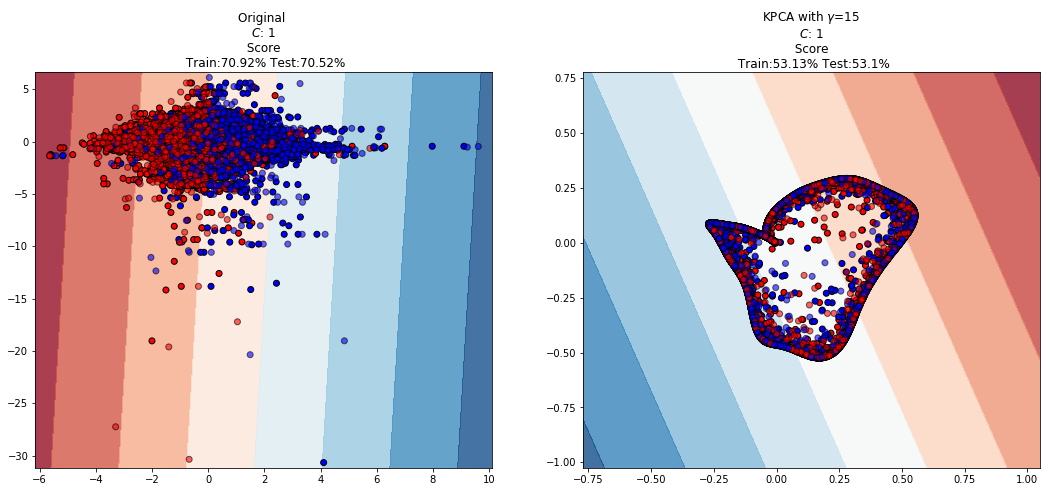

In [70]:
plot_transformed(X, y, 'rbf', 15, 1)

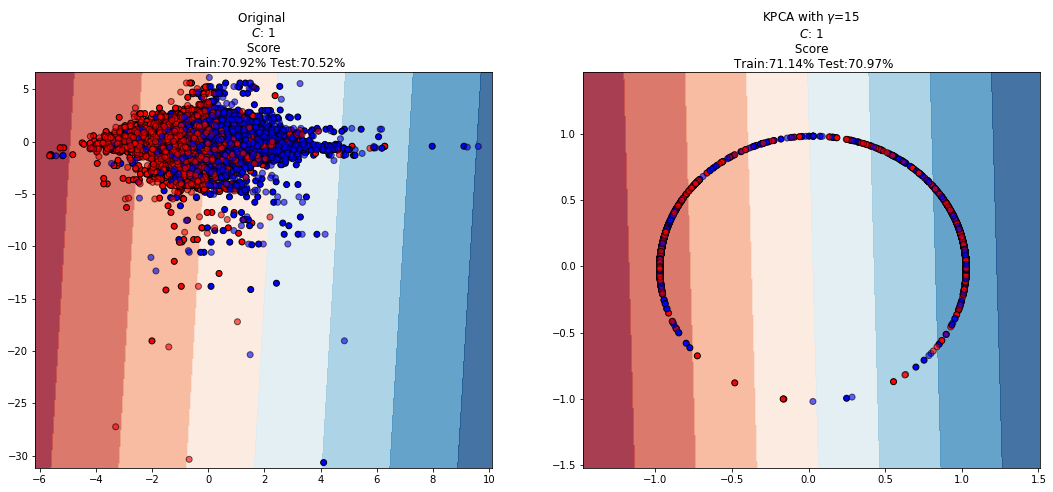

In [77]:
plot_transformed(X, y, 'cosine', 15, 1)

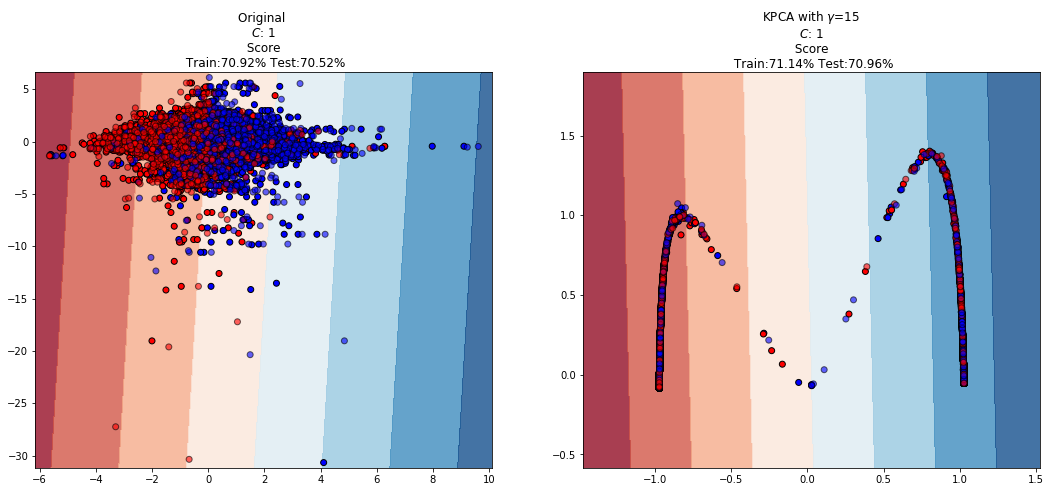

In [78]:
plot_transformed(X, y, 'sigmoid', 15, 1)